## Import all the libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

## Read the dataset

In [4]:
data= pd.read_csv('housing (1).csv')

## View the dimensions of the dataset

In [5]:
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [7]:
data.shape

(20640, 10)

## Plot histogram for the target variable

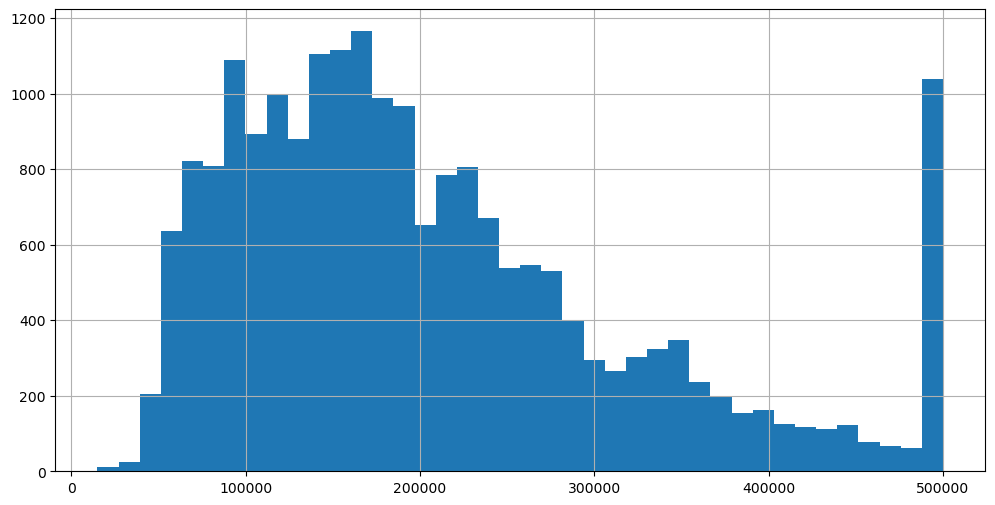

In [6]:
data.median_house_value.hist(bins=40, figsize=(12,6))
plt.show()

## View the data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Check for missing values

In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Impute missing values for numeric features

In [10]:
purpose_avg = data['total_bedrooms'].mean()

In [11]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(purpose_avg)

In [12]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Separating into Features & Target Variable

In [13]:
X= data.drop('median_house_value', axis=1)
y= data['median_house_value']

In [14]:
numerical_features = X.select_dtypes(exclude= ['object'])

In [15]:
numerical_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## Plot correlation among the variables

In [49]:
corr_among_variables= numerical_features.corr()

/var/folders/gq/g2c67fl53q1cybg7x2g_vc5h0000gn/T/ipykernel_2808/817214852.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"


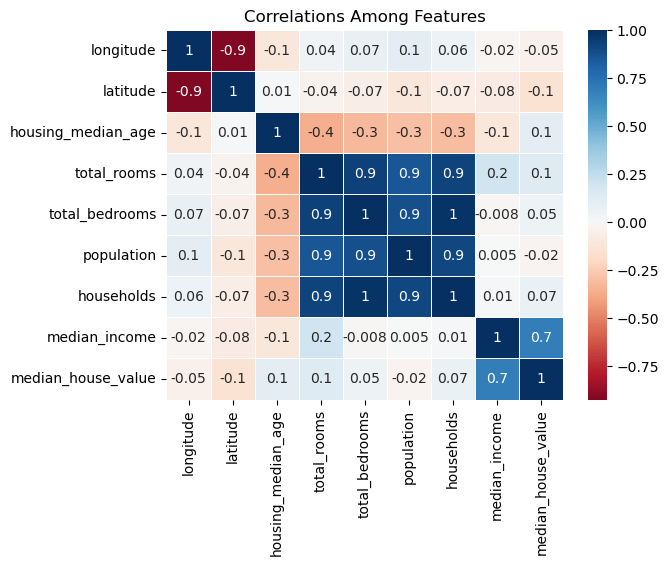

In [52]:
sns.heatmap(data.corr(),annot=True, cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=0.5, 
            linecolor='white',
            fmt='.0001g',
            center = 0,
            square=False)

plt.title("Correlations Among Features");

In [16]:
names_numerical = numerical_features.columns.tolist()
names_numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [17]:
min_max_scaler = preprocessing.MinMaxScaler()

In [18]:
numerical_features = min_max_scaler.fit_transform(numerical_features)
numerical_features

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.00894083, 0.02055583,
        0.53966842],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.0672104 , 0.18697583,
        0.53802706],
       [0.21015936, 0.5642933 , 1.        , ..., 0.01381765, 0.02894261,
        0.46602805],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.0281398 , 0.07104095,
        0.08276438],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.02068444, 0.05722743,
        0.09429525],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.03879032, 0.08699227,
        0.13025338]])

In [19]:
numerical_features = pd.DataFrame(numerical_features)

In [20]:
numerical_features.columns = names_numerical

In [21]:
numerical_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295


In [22]:
categorical_features = X.select_dtypes(include= ['object'])
categorical_features

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [23]:
categorical_features = pd.get_dummies(categorical_features, columns=categorical_features.columns.tolist())

In [24]:
categorical_features.head(2)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0


## Transformed dataset with no missing values and one-hot enecoded categorical feature

In [25]:
X_scale= pd.concat([numerical_features, categorical_features], axis=1)

In [26]:
X_scale.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0,0,0,1,0


## Splitting into Training & Testing Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20)

## Fitting the Regression Model

In [28]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

## Making the predictions

In [29]:
y_pred= lin_reg.predict(X_test)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
regressor_DT = DecisionTreeRegressor()

In [32]:
regressor_DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [33]:
y_pred = regressor_DT.predict(X_test)

In [34]:
MSE= mean_squared_error(y_test, y_pred)
#print('Mean_Squared_Error:', MSE )
RMSE= np.sqrt(MSE)
#print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Root_Mean_Squared_Error: 65121.76149335068


In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
regressor_RF = RandomForestRegressor(n_estimators=100, random_state=42)

In [37]:
regressor_RF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = regressor_RF.predict(X_test)

In [39]:
MSE= mean_squared_error(y_test, y_pred)
#print('Mean_Squared_Error:', MSE )
RMSE= np.sqrt(MSE)
#print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Root_Mean_Squared_Error: 48382.33776734362


In [40]:
from xgboost import XGBRegressor

In [41]:
X_train = X_train.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H_OCEAN'})
X_test = X_test.rename(columns={'ocean_proximity_<1H OCEAN': 'ocean_proximity_1H_OCEAN'})

In [42]:
regressor_xg = XGBRegressor(n_estimators=100, random_state=42)

In [43]:
regressor_xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [44]:
y_pred = regressor_xg.predict(X_test)

In [45]:
MSE= mean_squared_error(y_test, y_pred)
#print('Mean_Squared_Error:', MSE )
RMSE= np.sqrt(MSE)
#print('\n')
print('Root_Mean_Squared_Error:', RMSE )

Root_Mean_Squared_Error: 47045.678405602455


In [46]:
!pip install xgboost